# Set Up GPU

In [1]:
import tensorflow as tf

In [2]:
gpus = tf.config.list_physical_devices("GPU")

if gpus:
    for gpu in gpus:
        print("Found a GPU with the name: ", gpu)
else:
    print("Not found")

Found a GPU with the name:  PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [3]:
import os

In [4]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

# Library

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
import os
from PIL import Image
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import scipy
from tensorflow.keras.callbacks import ModelCheckpoint

# Directories

In [6]:
BASE_DIR = r'E:\Desktop\Recognition Model\Tomato\Tomato Dataset 1'

valid_dir = os.path.join(BASE_DIR, 'valid')
train_dir = os.path.join(BASE_DIR, 'train')

train_class_dir = [os.path.join(train_dir, d) for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]
valid_class_dir = [os.path.join(valid_dir, d) for d in os.listdir(valid_dir) if os.path.isdir(os.path.join(valid_dir, d))]

train_image_paths = []
valid_image_paths = []

for class_dir in train_class_dir:
    for file_name in os.listdir(class_dir):
        if file_name.endswith(('.JPG','.jpg','jpeg')):
            image_path = os.path.join(class_dir, file_name)
            train_image_paths.append(image_path)

for class_dir in valid_class_dir:
    for file_name in os.listdir(class_dir):
        if file_name.endswith(('.JPG','.jpg','jpeg')):
            image_path = os.path.join(class_dir, file_name)
            train_image_paths.append(image_path)


train_labels = [os.path.basename(class_dir) for class_dir in train_class_dir]
valid_labels = [os.path.basename(class_dir) for class_dir in valid_class_dir]

classes_train = os.listdir(train_dir)

classes_train

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']

# Data Preprocessing

In [7]:
target_size = (100,100)

batch_size = 64


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)


validation_generator = val_datagen.flow_from_directory(
    valid_dir,
    target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 5000 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [8]:
train_generator.class_indices

{'Tomato___Bacterial_spot': 0,
 'Tomato___Early_blight': 1,
 'Tomato___Late_blight': 2,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 3,
 'Tomato___healthy': 4}

In [9]:
class_directories = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]
num_classes = len(class_directories)
num_classes

5

# Build CNN

In [10]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (100,100,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation = 'relu', padding='same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation = 'relu', padding='same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(128, activation = 'relu'))

model.add(layers.Dropout(0.5))

model.add(layers.Dense(num_classes, activation='softmax'))

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 49, 49, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 128)      0

# Trainning

In [22]:
num_epochs = 15
steps_per_epoch = len(train_generator)
validation_steps = len(validation_generator)

filepath = r"E:\Desktop\Recognition Model\Tomato\Tomato Model 1"
save_checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, \
                             save_best_only=True, save_weights_only=False, \
                             mode='auto', save_frequency=1)

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=[save_checkpoint]
)

Epoch 1/15
79/79 [==============================] - ETA: 0s - loss: 0.1694 - accuracy: 0.9406
Epoch 1: val_loss improved from inf to 0.14661, saving model to E:\Desktop\Recognition Model\Tomato\Tomato Model 1


INFO:tensorflow:Assets written to: E:\Desktop\Recognition Model\Tomato\Tomato Model 1\assets


INFO:tensorflow:Assets written to: E:\Desktop\Recognition Model\Tomato\Tomato Model 1\assets


79/79 [==============================] - 15s 191ms/step - loss: 0.1694 - accuracy: 0.9406 - val_loss: 0.1466 - val_accuracy: 0.9480
Epoch 2/15
79/79 [==============================] - ETA: 0s - loss: 0.1440 - accuracy: 0.9498
Epoch 2: val_loss improved from 0.14661 to 0.11496, saving model to E:\Desktop\Recognition Model\Tomato\Tomato Model 1


INFO:tensorflow:Assets written to: E:\Desktop\Recognition Model\Tomato\Tomato Model 1\assets


INFO:tensorflow:Assets written to: E:\Desktop\Recognition Model\Tomato\Tomato Model 1\assets


79/79 [==============================] - 15s 188ms/step - loss: 0.1440 - accuracy: 0.9498 - val_loss: 0.1150 - val_accuracy: 0.9580
Epoch 3/15
78/79 [============================>.] - ETA: 0s - loss: 0.1179 - accuracy: 0.9595
Epoch 3: val_loss did not improve from 0.11496
79/79 [==============================] - 14s 173ms/step - loss: 0.1183 - accuracy: 0.9594 - val_loss: 0.1554 - val_accuracy: 0.9440
Epoch 4/15
79/79 [==============================] - ETA: 0s - loss: 0.1480 - accuracy: 0.9460
Epoch 4: val_loss did not improve from 0.11496
79/79 [==============================] - 14s 174ms/step - loss: 0.1480 - accuracy: 0.9460 - val_loss: 0.1978 - val_accuracy: 0.9200
Epoch 5/15
79/79 [==============================] - ETA: 0s - loss: 0.1103 - accuracy: 0.9624
Epoch 5: val_loss did not improve from 0.11496
79/79 [==============================] - 14s 174ms/step - loss: 0.1103 - accuracy: 0.9624 - val_loss: 0.1213 - val_accuracy: 0.9580
Epoch 6/15
79/79 [==============================]

INFO:tensorflow:Assets written to: E:\Desktop\Recognition Model\Tomato\Tomato Model 1\assets


INFO:tensorflow:Assets written to: E:\Desktop\Recognition Model\Tomato\Tomato Model 1\assets


79/79 [==============================] - 15s 191ms/step - loss: 0.1118 - accuracy: 0.9604 - val_loss: 0.1018 - val_accuracy: 0.9660
Epoch 7/15
79/79 [==============================] - ETA: 0s - loss: 0.1134 - accuracy: 0.9604
Epoch 7: val_loss did not improve from 0.10177
79/79 [==============================] - 14s 174ms/step - loss: 0.1134 - accuracy: 0.9604 - val_loss: 0.1225 - val_accuracy: 0.9520
Epoch 8/15
79/79 [==============================] - ETA: 0s - loss: 0.1087 - accuracy: 0.9594
Epoch 8: val_loss did not improve from 0.10177
79/79 [==============================] - 14s 174ms/step - loss: 0.1087 - accuracy: 0.9594 - val_loss: 0.1288 - val_accuracy: 0.9560
Epoch 9/15
79/79 [==============================] - ETA: 0s - loss: 0.1053 - accuracy: 0.9640
Epoch 9: val_loss improved from 0.10177 to 0.09804, saving model to E:\Desktop\Recognition Model\Tomato\Tomato Model 1


INFO:tensorflow:Assets written to: E:\Desktop\Recognition Model\Tomato\Tomato Model 1\assets


INFO:tensorflow:Assets written to: E:\Desktop\Recognition Model\Tomato\Tomato Model 1\assets


79/79 [==============================] - 15s 189ms/step - loss: 0.1053 - accuracy: 0.9640 - val_loss: 0.0980 - val_accuracy: 0.9480
Epoch 10/15
79/79 [==============================] - ETA: 0s - loss: 0.1867 - accuracy: 0.9342
Epoch 10: val_loss did not improve from 0.09804
79/79 [==============================] - 27s 335ms/step - loss: 0.1867 - accuracy: 0.9342 - val_loss: 0.1359 - val_accuracy: 0.9600
Epoch 11/15
79/79 [==============================] - ETA: 0s - loss: 0.0972 - accuracy: 0.9628
Epoch 11: val_loss did not improve from 0.09804
79/79 [==============================] - 14s 174ms/step - loss: 0.0972 - accuracy: 0.9628 - val_loss: 0.1496 - val_accuracy: 0.9480
Epoch 12/15
79/79 [==============================] - ETA: 0s - loss: 0.0856 - accuracy: 0.9696
Epoch 12: val_loss did not improve from 0.09804
79/79 [==============================] - 14s 172ms/step - loss: 0.0856 - accuracy: 0.9696 - val_loss: 0.1306 - val_accuracy: 0.9400
Epoch 13/15
79/79 [========================

INFO:tensorflow:Assets written to: E:\Desktop\Recognition Model\Tomato\Tomato Model 1\assets


INFO:tensorflow:Assets written to: E:\Desktop\Recognition Model\Tomato\Tomato Model 1\assets


79/79 [==============================] - 15s 187ms/step - loss: 0.1010 - accuracy: 0.9648 - val_loss: 0.0738 - val_accuracy: 0.9660
Epoch 14/15
79/79 [==============================] - ETA: 0s - loss: 0.1097 - accuracy: 0.9618
Epoch 14: val_loss did not improve from 0.07377
79/79 [==============================] - 14s 175ms/step - loss: 0.1097 - accuracy: 0.9618 - val_loss: 0.1168 - val_accuracy: 0.9580
Epoch 15/15
79/79 [==============================] - ETA: 0s - loss: 0.1570 - accuracy: 0.9466
Epoch 15: val_loss did not improve from 0.07377
79/79 [==============================] - 14s 175ms/step - loss: 0.1570 - accuracy: 0.9466 - val_loss: 0.1655 - val_accuracy: 0.9380


# Evaluation

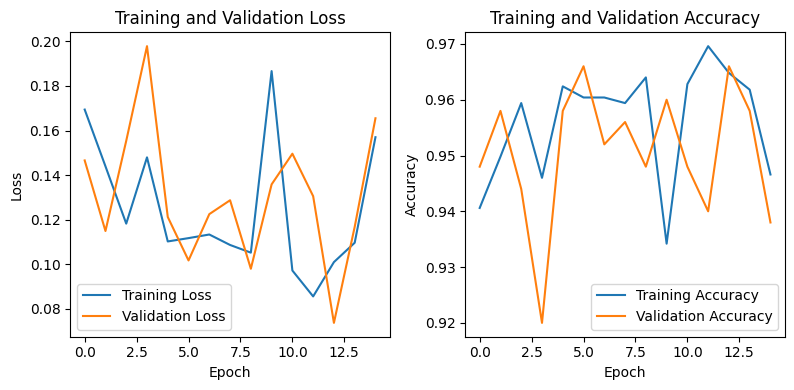

In [23]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1, 3, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()




plt.tight_layout()
plt.show()

# Save Model

In [24]:
#model.save("E:\Desktop\Recognition Model\Tomato\Tomato Model 1")